In [7]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn import svm
import matplotlib.pyplot as plt
from lwsspy.ml.dataset.svm import CCP2DF, plot_df
import hvplot.pandas  # noqa


In [4]:
# Load ccp data
df = CCP2DF()


Computing local mean, std ...
Computing slice means ...
Computing slice vars ...
Computing slice std
Summarizing in Dataframe


In [19]:
# Subsample
df = df.dropna()
X = df[df.columns[:-1]]
y = df['target']
rus = RandomUnderSampler(sampling_strategy='all')
Xr, yr = rus.fit_resample(X, y)

dfr = Xr.copy()
dfr['target'] = yr



In [13]:

from sklearn import svm
clf = svm.SVC(decision_function_shape='ovo')



In [15]:

svc = clf.fit(Xr, yr)




In [16]:
ypred = svc.predict(X)


In [24]:

loss = 1/len(y) * np.sum(((ypred - y)/3)**2)
print(loss)



0.17617756514


In [58]:
pos = np.where(np.isclose(df.y, 50.55))
dfx = df.iloc[pos]
print(len(dfx))


22218


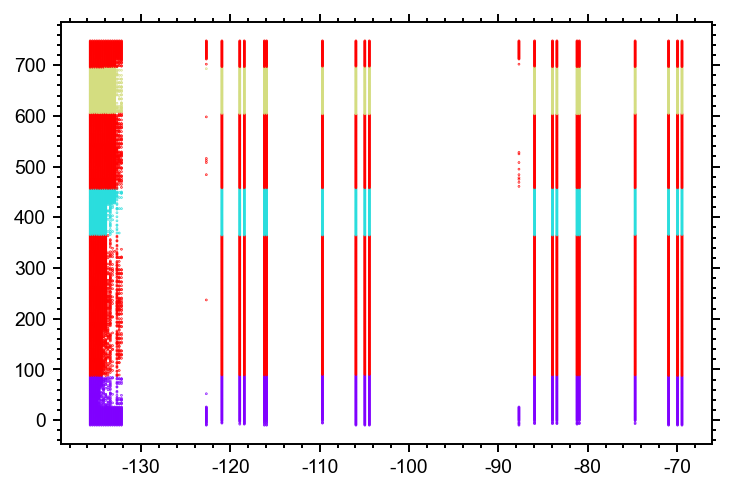

In [62]:
plt.scatter(dfx.x, dfx.z, s=0.1, c=ypred[pos], cmap='rainbow')